In [8]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

#from helper2 import generate_dataset, visualize_one_dataset, visualize_datasets, predict_grid, visualize_predictions
from torch.utils import data

%load_ext autoreload
%autoreload 2

import torchvision

from time import time
from torchvision import datasets, transforms
from torch import nn, optim

from helpers_opt_parameters import *
#from sdlbfgs import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

### MNIST dataset
The MNIST dataset is loaded.

In [6]:
trainset = datasets.FashionMNIST('', download=True, train=True, transform=transform)
valset = datasets.FashionMNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)

0%|          | 98304/26421880 [00:00<00:28, 931013.14it/s]Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz to FashionMNIST/raw/train-images-idx3-ubyte.gz
26427392it [00:00, 63865279.93it/s]
Extracting FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/raw
32768it [00:00, 714031.65it/s]
4423680it [00:00, 38588702.90it/s]Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz to FashionMNIST/raw/train-labels-idx1-ubyte.gz
Extracting FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/raw
Extracting FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/raw

8192it [00:00, 239342.28it/s]
Extracting FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/raw
Processing...
  2%|▏         | 507904/26421880 [00:00<00:05, 4897520.27it/s]Done!
26427392it [00:00, 84414567.98it/s]
Extracting PATH_TO_STORE_TESTSET/FashionMNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/Fa

In [7]:
print("Training and test sets information is displayed.\n\n")
print("Trainset:\n",trainset)
print("Testset:\n",valset)

Training and test sets information is displayed.


Trainset:
 Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Testset:
 Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: PATH_TO_STORE_TESTSET
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


# LBFGS mini-batch hyperparameters tuning 



In [9]:
minibatch_size_grid=[32,64]
max_iter = 3
history_size_grid=[10,20]

In [13]:
epochs = 30

### Fully connected network

In [14]:
training_loss_fcnn, test_loss_fcnn,training_accuracy_fcnn, test_accuracy_fcnn, time_fcnn =hyperparameters_tuning_LBFGS_minibatch(trainset,valset,minibatch_size_grid, history_size_grid, max_iter,epochs, "FCNN")

Minibatch size:  32
History size:  10
Epoch 0
Training loss: 0.4161124161938826
Number Of Images Tested = 10000
Model Accuracy = 0.7527
Number Of Images Tested = 60000
Model Accuracy = 0.7689833333333334
Test loss: 0.6839175813447553 


Training Time (in minutes) = 2.6926373561223347




In [15]:
np.savetxt('1/LBFGS_minibatch_fcNN_trainloss.txt', training_loss_fcnn)
np.savetxt('1/LBFGS_minibatch_fcNN_testloss.txt', test_loss_fcnn)
np.savetxt('1/LBFGS_minibatch_fcNN_trainacc.txt', training_accuracy_fcnn)
np.savetxt('1/LBFGS_minibatch_fcNN_testacc.txt', test_accuracy_fcnn)
np.savetxt('1/LBFGS_minibatch_fcNN_times.txt',time_fcnn)

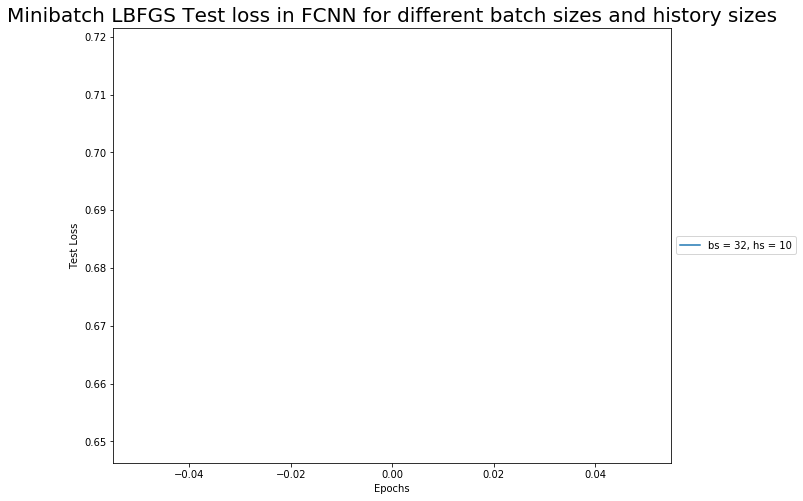

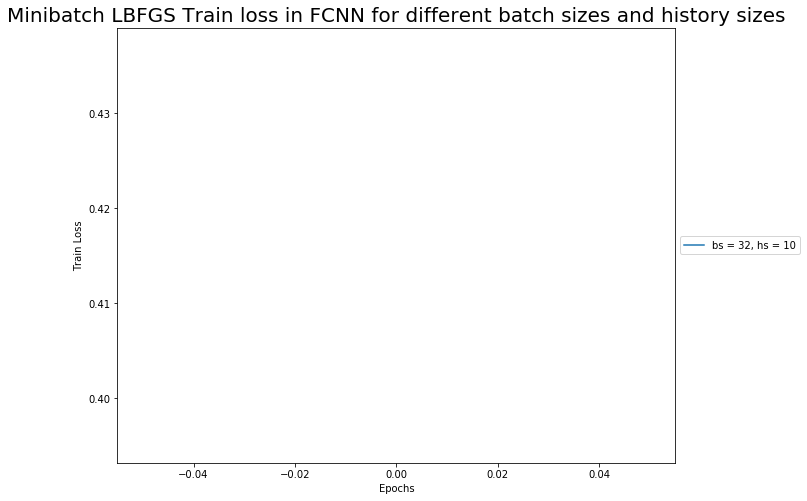

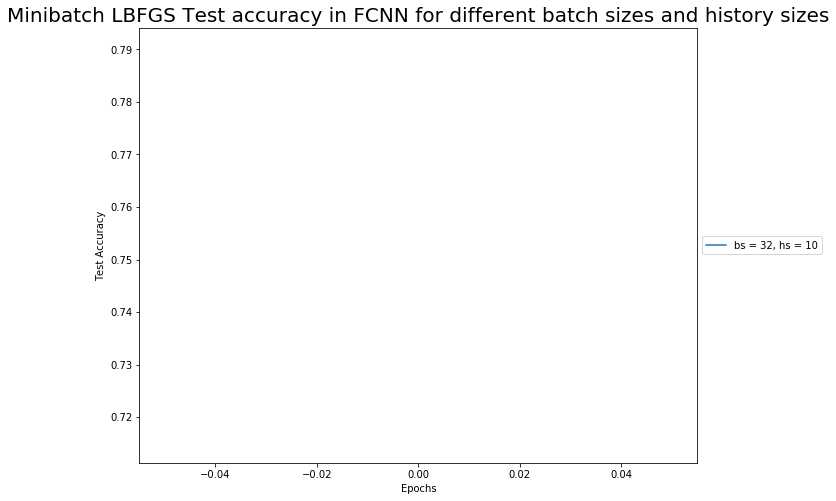

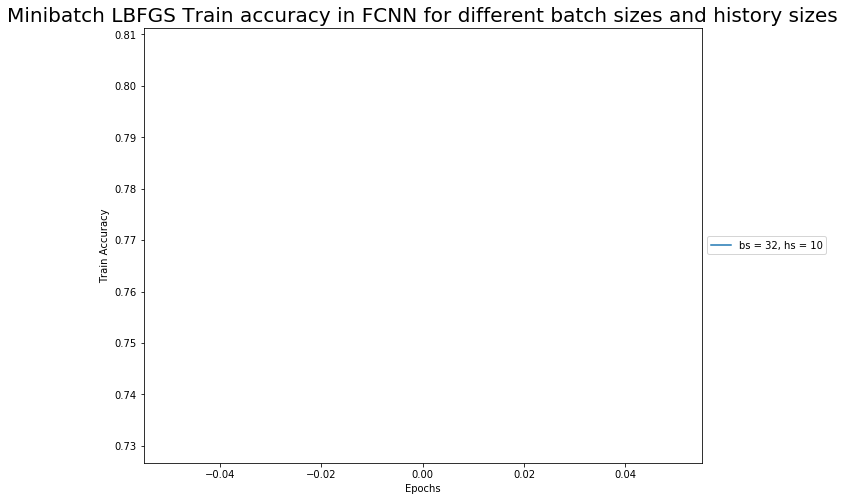

In [16]:
i = 0
for bs_index,bs in enumerate(minibatch_size_grid):
    for hs_index,hs in enumerate(history_size_grid):
        plt.figure(1, figsize = (10,8))
        plt.plot(test_loss_fcnn[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(2, figsize = (10,8))
        plt.plot(training_loss_fcnn[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(3, figsize = (10,8))
        plt.plot(test_accuracy_fcnn[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(4, figsize = (10,8))
        plt.plot(training_accuracy_fcnn[i],label='bs = {}, hs = {}'.format(bs,hs))
        i+=1

plt.figure(1)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Minibatch LBFGS Test loss in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("1/mini_LBFGS_test_loss_fcnn.jpg")
plt.figure (2)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Minibatch LBFGS Train loss in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("1/mini_LBFGS_train_loss_fcnn.jpg")
plt.figure (3)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Minibatch LBFGS Test accuracy in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("1/mini_LBFGS_test_acc_fcnn.jpg")
plt.figure (4)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('Minibatch LBFGS Train accuracy in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("1/mini_LBFGS_train_acc_fcnn.jpg")

In [12]:
minibatch_size_grid = [128,512,1024]

history_size_grid=[10,20]

In [0]:
training_loss_fcnn2, test_loss_fcnn,training_accuracy_fcnn2, test_accuracy_fcnn2, time_fcnn2 = hyperparameters_tuning_LBFGS_minibatch(trainset,valset,minibatch_size_grid, history_size_grid, max_iter,epochs, "FCNN2")

In [ ]:
np.savetxt('2/LBFGS_minibatch_fcNN_trainloss.txt', training_loss_fcnn2)
np.savetxt('2/LBFGS_minibatch_fcNN_testloss.txt', test_loss_fcnn2)
np.savetxt('2/LBFGS_minibatch_fcNN_trainacc.txt', training_accuracy_fcnn2)
np.savetxt('2/LBFGS_minibatch_fcNN_testacc.txt', test_accuracy_fcnn2)
np.savetxt('2/LBFGS_minibatch_fcNN_times.txt',time_fcnn2)

In [ ]:
i = 0
for bs_index,bs in enumerate(minibatch_size_grid):
    for hs_index,hs in enumerate(history_size_grid):
        plt.figure(1, figsize = (10,8))
        plt.plot(test_loss_fcnn2[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(2, figsize = (10,8))
        plt.plot(training_loss_fcnn2[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(3, figsize = (10,8))
        plt.plot(test_accuracy_fcnn2[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(4, figsize = (10,8))
        plt.plot(training_accuracy_fcnn2[i],label='bs = {}, hs = {}'.format(bs,hs))
        i+=1

plt.figure(1)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Minibatch LBFGS Test loss in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("2/mini_LBFGS_test_loss_fcnn.jpg")
plt.figure (2)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Minibatch LBFGS Train loss in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("2/mini_LBFGS_train_loss_fcnn.jpg")
plt.figure (3)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Minibatch LBFGS Test accuracy in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("2/mini_LBFGS_test_acc_fcnn.jpg")
plt.figure (4)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('Minibatch LBFGS Train accuracy in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("2/mini_LBFGS_train_acc_fcnn.jpg")